# Initial Value Problems

In initial value problems we solve ordinary differential equations (ODEs) of the form ${dy \over dt} = f(t,y)$ subject to initial conditions: $y=y_0$ at $t=t_0$. Using forward finite-different, we can write this ODE as

${y_{i+1} - y{i} \over h}=\phi$

where $h=\Delta t$ is the step size and $\phi$ is the increment function.


## Euler's method

In Euler's method, the increment function is the right-hand-side (RHS) function $f(t,y)$ evaluated at $t_i$ and $y_i$: $\phi=f(t_i, y_i)$. Therefore,

$y_{i+1} = y_{i} + hf(t_i, y_i)$

### Code: `euler` function
Solves one ODE using Euler's method.

In [ ]:
def euler(rhs, xint, y0, h = 1, *args):
  """
  euler: solves an ODE based on Euler method

  euler(rhs, xint, y0, h = 1, *args):
           uses Euler's method to solve an ODE
  input:
    rhs : the RHS function as rhs(x,y,*args)
    xint: independent variable interval [x0, xf] 
          where x0 is initial and xf is final value of independent variable
    y0 : dependent variable initial value
    h : step size (h = 1 by default)
    *args : additional parameters passed to the rhs function
  output:
    x : vector of the independent variable
    y : vector of solution for the dependent variable
  """
  import numpy as np
  x0 = xint[0] # lower limit of x interval
  xf = xint[1] # upper limit of x interval
  # making sure xf > x0
  assert xf > x0, "the final value must be greater than the inital one"

  x = np.arange(x0, xf + h, h)
  n = x.size -1 # index for the last element of x
  # if the end point is not xf based on how arange operates, set the final point to xf
  if x[n] < xf: # if the last point is smaller than xf, add another point and extend the array
    x[n+1] = xf
    n = n + 1
  elif x[n] > xf: # if the last point is greater than xf, set to xf
    x[n] = xf
  y = np.zeros(n+1,float) # allocating the dependenat variable array with the same size as x
  y[0] = y0  # set the 1st element to the initial condition
  for i in range(n):
    h = x[i+1] - x[i]    # step size
    f = rhs(x[i], y[i], *args)  # evaluate the RHS function at x[i] and y[i]
    y[i+1] = y[i] + h * f       #Euler's method
  return x, y


### Example
Solve ${dy \over dt} = 4e^{0.8t} - 0.5y$ from $t=0$ to $t=4$ using Euler's method with the step size $h=1$ and initial condition of $y = 2$ at $t = 0$. Calculate the true error at each time. The true solution is give as

t| 0 | 1 | 2 | 3 | 4
---|---|---|---|---|---
y| 2.0 | 6.19463 | 14.84392 | 33.67717 | 75.33896

t=
 [0. 1. 2. 3. 4.]
ODE solution: y=
 [ 2.          5.         11.40216371 25.51321155 56.8493113 ]
true error (%) = 
 [ 0.         19.28492904 23.18630312 24.24181855 24.54194842]



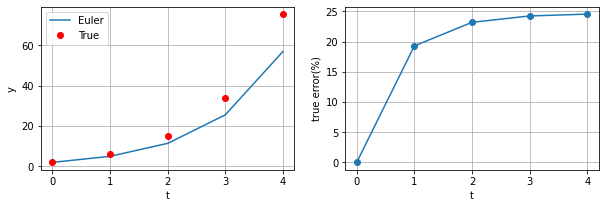

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dydx = lambda t, y: 4. * np.exp(0.8 * t) - 0.5 * y   # build the RHS function
tint = [0., 4.]
t, y1 = euler(dydx, tint, 2., 1.)
print('t=\n', t)
print('ODE solution: y=\n', y1) 
yt = np.array([2.0, 6.19463, 14.84392, 33.67717, 75.33896])  # true value
et1 = abs((yt - y1) / yt) * 100
print('true error (%) = \n', et1) 
print()
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(t, y1, label='Euler')
plt.plot(t, yt, 'ro', label='True')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(122)
plt.plot(t, et1, 'o-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('true error(%)')
plt.show();

It is shown that the error grows as time increases. 

Now, we solve the same problem with step size $h=0.1$ and compare the results.

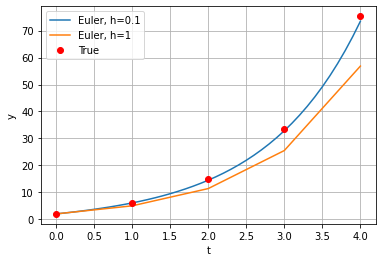

In [ ]:
t01, y01 = euler(dydx, tint, 2., 0.1)
plt.plot(t01, y01, label='Euler, h=0.1')
plt.plot(t, y1, label='Euler, h=1')
plt.plot(t, yt, 'ro', label='True')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show();

As shown, $h=0.1$ provides more accurate solution to the ODE.

## Stability of Euler's method

A numerical method is stable if it doesn't allow the errors (truncation and round-off) to grow. Some method have a stability condition which puts a limitation on the step size. If the stability condition is satisfied, the method provides a stable solution. Otherwise, instability occurs and no useful solution can be obtained and often the numerical solution breaks down.

To demonstrate, in the example below we solve $\frac{dy}{dt}=-y$ with the initial condition of $y=1$ at $t=0$ using Euler's method. As shown in the lessons, the stability condition for this ODE using Euler's method is $h < 2$. 

We first choose $h=0.5$ which satisfies this condition and then we repeat the calculation with $h=3$ which violates this condition.

**(1) Stable solution with $h=0.5 < 2$**. The solution is compared with the exact solution $y(t) = e^{-t}$.

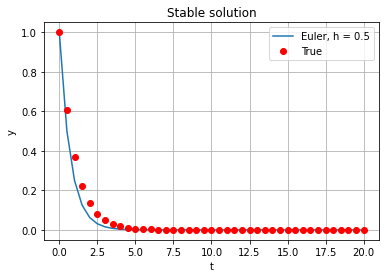

In [ ]:
# Stable solution with h=0.5
dydx = lambda t, y: -y   # the RHS function
tint = [0., 20.]
h = 0.5
t, y = euler(dydx, tint, 1., h)
yt = np.exp(-t)  # true value
plt.plot(t, y, label='Euler, h = 0.5')
plt.plot(t, yt, 'ro', label='True')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Stable solution')
plt.legend()
plt.show();

As shown, the solution obtained with $h=0.5$ compares well with the exact solution. 

**(2) Unstable solution with $h=2.5 > 2$**. Comparison with the exact solution is pointless since the unstable solution is not useful after all. Note the range of variation of the solution in the plot below. This solution goes to $\infty$ very quickly if we continue the calculations for larger $t$ values.

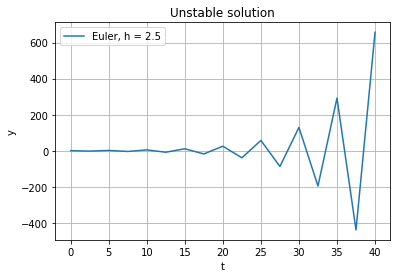

In [ ]:
# Unstable solution with h=2.5
dydx = lambda t, y: -y   # the RHS function
h = 2.5
tint = [0., 40.]
t, y = euler(dydx, tint, 1., h)
plt.plot(t, y, label='Euler, h = 2.5')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Unstable solution')
plt.legend()
plt.show();

## Runge-Kutta (RK) method

Runge-Kutta methods are a class of methods which use the information on the slope at multiple points to extrapolate the solution to the future time step.

### Code: `rk4sys` function

In [ ]:
def rk4sys(rhs, xint, y0, h = 1, *args):
  """
  rk4sys: ODE solver based on 4th order Runge-Kutta method for a system of ODEs

  rk4sys(rhs, xint, y0, h = 1, *args):
           uses 4th order Runge-Kutta method to solve a system of ODEs
  input:
    rhs : the RHS function as rhs(x,y,*args) 
          where y is a vector of dependent variables
    xint: independent variable interval which can be specified 2 ways:
          1) [x0, xf] 
             where x0 is initial and xf is final value of independent variable.
             Output will be on x values in [x0 xf] interval with step size h
          2) [x0, x1, ..., xf] which are the specific x values for which solution 
              should be output
    y0 : vector of dependent variables initial value
    h : step size (h = 1 by default)
    *args : additional parameters passed to the rhs function
  output:
    x : vector of the independent variable
    y : vector of solution for all the dependent variables
  """
  import numpy as np
  # makeing sure x is in ascending order
  xdiff = np.diff(xint)
  assert np.min(xdiff) >= 0 , "x array is not in ascending order"

  n = xint.size - 1  # index for the last element of xint
  x0 = xint[0]
  xf = xint[-1]
  if n == 1:
    x = np.arange(x0, xf + h, h)
    n = x.size - 1  # index for the last element of x
    if x[n] < xf:
      np.append(x,xf)
      n = n + 1
  else:
    x = xint

  if np.isscalar(y0):
    m = 1  
  else:
    m = y0.size 
  yp = np.zeros((m,n+1),float)
  xp = np.zeros(n+1,float)
  xx = x0
  yy = y0
  np = 0
  xp[np] = xx
  yp[:,np] = yy
  i = 0
  while True:
    xend = x[np+1]
    hh = x[np+1] - x[np]
    if hh > h:
      hh = h
    while True:
      if xx + hh > xend:
        hh = xend - xx
      k1 = rhs(xx, yy, *args)  # calculates k1 using RHS function at x[i] and y[i,:]
      y1 = yy + k1 * 0.5 * hh
      k2 = rhs(xx + 0.5 * hh, y1, *args)
      y1 = yy + k2 * 0.5 * hh
      k3 = rhs(xx + 0.5 * hh, y1, *args)
      y1 = yy + k3 * hh
      k4 = rhs(xx + hh, y1, *args)
      phi = (k1 + 2. * (k2 + k3) + k4) / 6.
      yy1 =  yy + phi * hh
      xx = xx + hh
      i = i + 1
      yy = yy1
      if xx >= xend:
        break
    np = np + 1
    xp[np] = xx
    yp[:,np] = yy
    if xx >= xf:
      break
  return xp, yp


### Example

Solve ${dy \over dt} = 4e^{0.8t} - 0.5y$ from $t=0$ to $t=4$ using 4th order Runge-Kutta method with the step size $h=1$ and initial condition of $y = 2$ at $t = 0$. Compare the results with the true values provided below.

t| 0 | 1 | 2 | 3 | 4
---|---|---|---|---|---
y| 2.0 | 6.19463 | 14.84392 | 33.67717 | 75.33896 

Solution on a specified x interval
t=
 [0. 1. 2. 3. 4.]
ODE solution: y=
 [[ 2.          6.20103707 14.86248359 33.72134801 75.43917199]]

Solution on a specified points
t=
 [0.  0.5 1.3 2.5 3.6 4. ]
ODE solution: y=
 [[ 2.          3.7516995   8.14624844 22.44570286 54.69269309 75.3871539 ]]

true value: y=
 [ 2.       6.19463 14.84392 33.67717 75.33896]


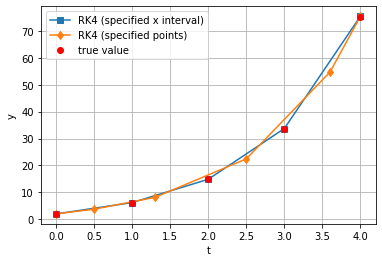

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dydx = lambda t, y: 4. * np.exp(0.8 * t) - 0.5 * y  # RHS function specification
xint = np.array([0., 4.])  # specifing an interval to call rk4sys
t, y1 = rk4sys(dydx, xint, 2., 1.)
print('Solution on a specified x interval')
print('t=\n', t)
print('ODE solution: y=\n', y1) 
plt.plot(t, y1[0,:], 's-',label='RK4 (specified x interval)')
print()

xint = np.array([0., 0.5, 1.3, 2.5, 3.6, 4.]) # specifing specific points at which the solution is needed
t, y1 = rk4sys(dydx, xint, 2., 1.)
print('Solution on a specified points')
print('t=\n', t)
print('ODE solution: y=\n', y1) 
plt.plot(t, y1[0,:],'d-', label='RK4 (specified points)')
print()

t = [0., 1., 2., 3., 4.]
yt = np.array([2.0, 6.19463, 14.84392, 33.67717, 75.33896])  # true value
print('true value: y=\n', yt) 
plt.plot(t, yt, 'ro', label='true value')
plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.show();


## System of ODEs

Systems of ODEs consist of several ODEs that are coupled and need to be solved simultaneously such as
$$\begin{cases} 
\frac{dy_1}{dt}=f_1(t,y_1,y_2,\ldots,y_n) \\
\frac{dy_2}{dt}=f_2(t,y_1,y_2,\ldots,y_n) \\ 
\vdots \\
\frac{dy_n}{dt}=f_n(t,y_1,y_2,\ldots,y_n) \\ 
\end{cases}$$
in which there are $n$ dependenat variables $y_1, \ldots, y_n$ and there are $n$ RHS function $f_1,\ldots, f_n$. This system of ODEs require $n$ inital conditions for all dependent variables. To solve this system we apply the ODE solvers to the individual ODEs in the system simultaneously. For example, using Euler's method we obtain
$$\begin{cases} 
y_{1_{i+1}}=y_{1_{i}}+hf_1(t_i,y_{1_{i}},y_{2_{i}},\ldots,y_{n_{i}}) \\
y_{2_{i+1}}=y_{2_{i}}+hf_2(t_i,y_{1_{i}},y_{2_{i}},\ldots,y_{n_{i}}) \\
\vdots \\
y_{n_{i+1}}=y_{n_{i}}+hf_n(t_i,y_{1_{i}},y_{2_{i}},\ldots,y_{n_{i}}) \\
\end{cases}$$
where $h=\Delta t$ is the step size. This is a system of algebraic equations which need to be solved simultaneously. The following the the code for Euler's method, modified to handle a system of ODEs. The `rk4sys` function presented above is able to solve an ODE as well as a system of ODEs by design.

### Code: `eulersys` function
Solves a system of ODEs using Euler's method.

In [ ]:
def eulersys(rhs, xint, y0, h = 1, *args):
  """
  eulersys: solves a system of ODEs using Euler method

  eulersys(rhs, xint, y0, h = 1, *args):
           uses Euler's method to solve a system of ODEs
  input:
    rhs : the RHS function as rhs(x,y,*args)
    xint: independent variable interval [x0, xf] 
          where x0 is initial and xf is final value of independent variable
    y0 : dependent variable initial values
    h : step size (h = 1 by default)
    *args : additional parameters passed to the rhs function
  output:
    x : vector of the independent variable
    y : vector of solution for the dependent variables
  """
  import numpy as np
  x0 = xint[0] # lower limit of x interval
  xf = xint[1] # upper limit of x interval
  # making sure xf > x0
  assert xf > x0, "the final value must be greater than the inital one"

  x = np.arange(x0, xf + h, h)
  n = x.size -1 # index for the last element of x
  # if the end point is not xf based on how arange operates, set the final point to xf
  if x[n] < xf: # if the last point is smaller than xf, add another point and extend the array
    x[n+1] = xf
    n = n + 1
  elif x[n] > xf: # if the last point is greater than xf, set to xf
    x[n] = xf
  if np.isscalar(y0):
    m = 1  
  else:
    m = len(y0)   
  y = np.zeros((m,n+1),float) # allocating the dependenat variable array with the same size as x
  y[:,0] = y0  # set the 1st element to the initial condition
  for i in range(n):
    h = x[i+1] - x[i]    # step size
    f = rhs(x[i], y[:,i], *args)  # evaluate the RHS function at x[i] and y[i]
    y[:,i+1] = y[:,i] + h * f       #Euler's method
  return x, y


### Example
Solve $\frac{d^2x}{dt^2} = 9.81 - \frac{0.25}{68.1}v^2$ subject to initial condition $x=v=0$ at $t=0$ using Euler's and Runge-Kutta methods with step size $h=2$.

We first write this second order ODE in terms of two first order ODEs as follows:
$$\begin{cases} 
\frac{dx}{dt}=v\\
\frac{dv}{dt}=9.81 - \frac{0.25}{68.1}v^2 \\ 
\end{cases}$$
which provides both $x(t)$ and $v(t)$. To utilize the ODE solvers in python we first define a dependent variable array `y = [y0, y1]` where `y0` referes to $x(t)$ and `y1` referes to $v(t)$. Rewriting this system in terms of `y` we obtain
```
dy0/dt = y1
dy1/dt = 9.81 - (0.25/68.1)y1**2
```
Next we create a python function or a lambda function to return the RHS function of these two equations as a vector. We then pass the function name to the ODE solvers.




     t  |  x (rk4)   v(rk4)  | x(Euler)   v(Euler)
   -----| --------  -------  | --------   -------
    0.0 |   0.0000   0.0000  |   0.0000    0.0000
    2.0 |  19.1656  18.7256  |   0.0000   19.6200
    4.0 |  71.9311  33.0995  |  39.2400   36.4137
    6.0 | 147.9521  42.0547  | 112.0674   46.2983
    8.0 | 237.5104  46.9345  | 204.6640   50.1802
   10.0 | 334.1626  49.4027  | 305.0244   51.3123



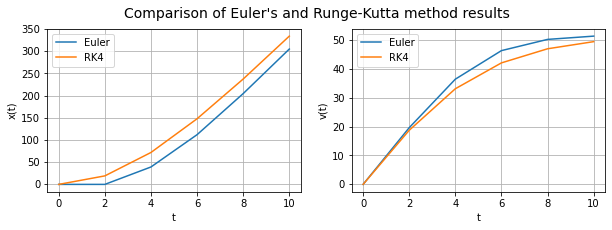

In [ ]:
# this lambda function calculates the RHS function for both ODEs and return them as a vector
# we pass this function to the ODE solvers
# Note that the order input arguments must be exacty the same as specified here
dy = lambda t, y: np.array([y[1], 9.81 - 0.25 / 68.1 * y[1]**2])
"""
Alternatively, we could define this function as a python function as follows and pass the name to the ODE solvers:
def dy(t, y):  # the input arguments are t and y = [y0, y1] which is a vector of dependent variables 
               # Note that the order input arguments must be exacty the same as specified here
  dydt = np.array([y[1], 9.81 - 0.25 / 68.1 * y[1]**2]) # this array include the RHS function for the ODEs
  return dydt  #returns the RHS function arrays
"""  
y0 = np.array([0., 0.])
tint = np.array([0., 10.])
h = 2  #step size
te, ye = eulersys(dy, tint, y0, h) # using Euler's method
tr, yr = rk4sys(dy, tint, y0, h)      # using RK4 method
# print the results in a table
print('     t  |  x (rk4)   v(rk4)  | x(Euler)   v(Euler)')
print('   -----| --------  -------  | --------   -------')
for i,tt in enumerate(te):
  print('{0:7.1f} | {1:8.4f} {2:8.4f}  | {3:8.4f}  {4:8.4f}'.format(tr[i], yr[0,i], yr[1,i], ye[0,i], ye[1,i]))
print()
# plot the results
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(te, ye[0,:], label='Euler')
plt.plot(tr, yr[0,:], label='RK4')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.subplot(122)
plt.plot(te, ye[1,:], label='Euler')
plt.plot(tr, yr[1,:], label='RK4')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.suptitle("Comparison of Euler's and Runge-Kutta method results", fontsize=14)
plt.show();

### Exercise

Solve $\frac{d^2 y}{dt^2} - (1-y^2)\frac{d y}{dt}+ y = 0$ with the initial condition $y(0) = 1$ and $y'(0)=1$ from $t=0$ to $10$ using (a) Euler's method and (b) 4th order Runge-Kutta method. Use a step size of $0.1$. Plot both solutions on the same plot to compare.